<a href="https://colab.research.google.com/github/eunjoo-ny/ML-Code/blob/main/4_Lesson_4_Image_Classification_with_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split


In [3]:
project_name='05-cifar10-cnn'

In [4]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

In [5]:
# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
  tar.extractall(path='./data')

In [6]:
data_dir = './data/cifar10'
print(os.listdir(data_dir ))
classes = os.listdir(data_dir + "/train")
print(classes)

['train', 'test']
['truck', 'airplane', 'cat', 'deer', 'horse', 'automobile', 'dog', 'frog', 'ship', 'bird']


In [7]:
airplane_files = os.listdir(data_dir +"/train/airplane")
print('No. of training examples for airplanes:',len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['3073.png', '3945.png', '1341.png', '2948.png', '4330.png']


In [8]:
ship_test_files = os.listdir(data_dir +"/test/ship")
print("No. of test examples for ship:",len(ship_test_files))
print(ship_test_files[:5])

No. of test examples for ship: 1000
['0725.png', '0902.png', '0852.png', '0752.png', '0707.png']


In [9]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [10]:
dataset =ImageFolder(data_dir+ '/train', transform =ToTensor())

In [11]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

In [ ]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor']='#ffffff'

In [ ]:
def show_example(img,label):
  print('Label:',dataset.classes[label], "("+str(label)+")")
  plt.imshow(img.permute(1,2,0))

Label: airplane (0)


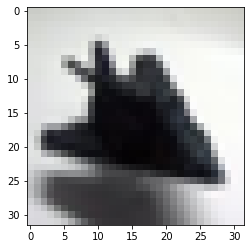

In [ ]:
show_example(*dataset[0])

Label: airplane (0)


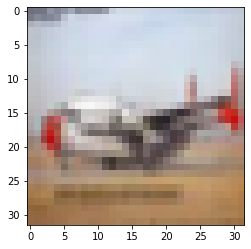

In [ ]:
show_example(*dataset[1099])

Label: airplane (0)


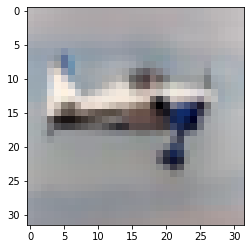

In [ ]:
show_example(*dataset[237])

In [17]:
!pip install jovian --upgrade -q


     |████████████████████████████████| 71kB 5.7MB/s 


In [35]:
import jovian


In [36]:
jovian.commit(project='05-cifar10-cnn')

[jovian] Detected Colab notebook...


[jovian] Error: Colab File Id is not provided. Make sure to execute the cell where the Id is set.


In [19]:
random_seed =42
torch.manual_seed(random_seed);

In [20]:
val_size =5000
train_size =len(dataset)-val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [21]:
jovian.log_dataset(dataset_url=dataset_url, val_size=val_size, random_seed=random_seed)

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Dataset logged.


In [31]:
from torch.utils.data.dataloader import DataLoader
batch_size =128
import matplotlib.pyplot as plt

In [28]:
train_dl= DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory= True)
val_dl= DataLoader(val_ds, batch_size+2, num_workers =4, pin_memory=True)
train_dl,val_dl

(<torch.utils.data.dataloader.DataLoader at 0x7fe4c7b83f98>,
 <torch.utils.data.dataloader.DataLoader at 0x7fe4c7a9c4e0>)

In [29]:
from torchvision.utils import make_grid
def show_batch(dl):
  for images, labels in dl:
    fix, ax =plt.subplots(figsize=(12,6))
    ax.set_xticks([]);ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1,2,0))
    break

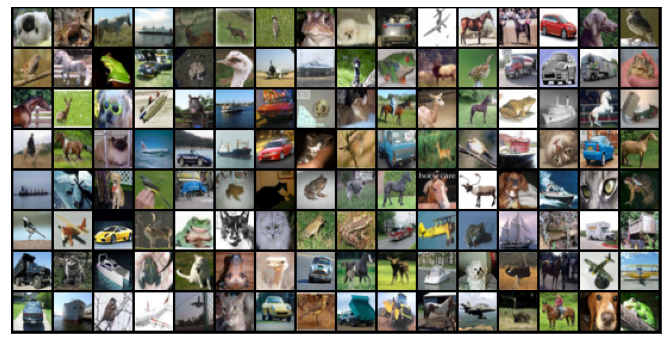

In [32]:
show_batch(train_dl)

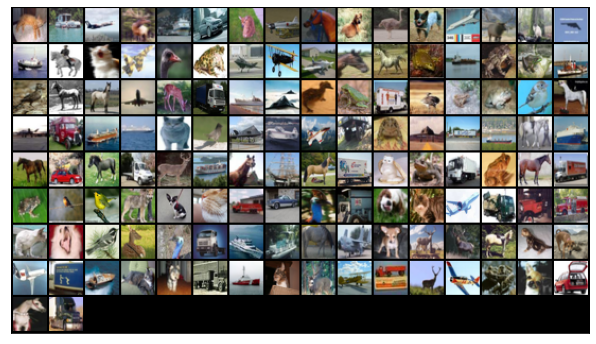

In [33]:
show_batch(val_dl)

In [34]:
jovian.commit(project='05-cifar10-cnn', environment=None)

[jovian] Detected Colab notebook...


[jovian] Error: Colab File Id is not provided. Make sure to execute the cell where the Id is set.


# New Section